In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.UNIMIB)

cfg.parallelize = True
cfg.in_memory = True
#force_recompute = False
force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-18 14:39:22,231 - whar-datasets - INFO - Running DownloadingStep
2026-02-18 14:39:22,233 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-18 14:39:22,237 - whar-datasets - INFO - Hash is up to date
2026-02-18 14:39:22,239 - whar-datasets - INFO - Forcing recompute
2026-02-18 14:39:22,241 - whar-datasets - INFO - Running ParsingStep
2026-02-18 14:39:22,242 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-18 14:39:22,247 - whar-datasets - INFO - Hash is up to date
2026-02-18 14:39:22,249 - whar-datasets - INFO - Checking download
2026-02-18 14:39:22,249 - whar-datasets - INFO - Download exists
2026-02-18 14:39:22,253 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 510/510 [00:01<00:00, 266.10it/s]
2026-02-18 14:39:26,470 - whar-datasets - INFO - Saving common format
2026-02-18 14:39:27,055 - whar-datasets - INFO - Forcing recompute
2026-02-18 14:39:27,057 - whar-datasets - INFO - Running WindowingStep
2026-02-1

[########################################] | 100% Completed | 8.19 ss


2026-02-18 14:39:35,894 - whar-datasets - INFO - Common format validated.
2026-02-18 14:39:35,894 - whar-datasets - INFO - Compute windowing
2026-02-18 14:39:35,894 - whar-datasets - INFO - Selecting activities
2026-02-18 14:39:35,910 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 29.10 s


2026-02-18 14:40:05,827 - whar-datasets - INFO - Saving windowing
2026-02-18 14:40:09,750 - whar-datasets - INFO - Loading windowing
2026-02-18 14:40:09,800 - whar-datasets - INFO - activity_ids from 0 to 16
2026-02-18 14:40:09,803 - whar-datasets - INFO - subject_ids from 0 to 29


In [4]:
# splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

fold_0 3840 960 534
fold_1 3840 960 534
fold_2 3840 960 534
fold_3 3840 960 534
fold_4 3841 960 533
fold_5 3841 960 533
fold_6 3841 960 533
fold_7 3841 960 533
fold_8 3841 960 533
fold_9 3841 960 533


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-18 14:40:09,926 - whar-datasets - INFO - Forcing recompute
2026-02-18 14:40:09,929 - whar-datasets - INFO - Running SamplingStep
2026-02-18 14:40:09,930 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-18 14:40:09,939 - whar-datasets - INFO - Hash is not up to date
2026-02-18 14:40:12,609 - whar-datasets - INFO - Computing samples
2026-02-18 14:40:12,611 - whar-datasets - INFO - Getting normalization parameters
2026-02-18 14:40:12,914 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 18.44 s


2026-02-18 14:40:32,019 - whar-datasets - INFO - Saving samples
2026-02-18 14:40:32,116 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

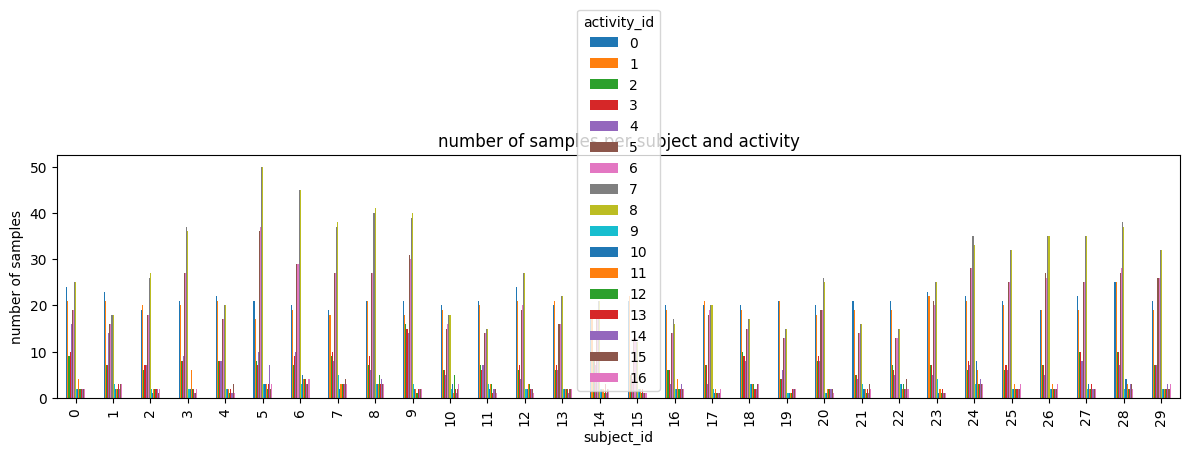

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: [7], Subject: 0')

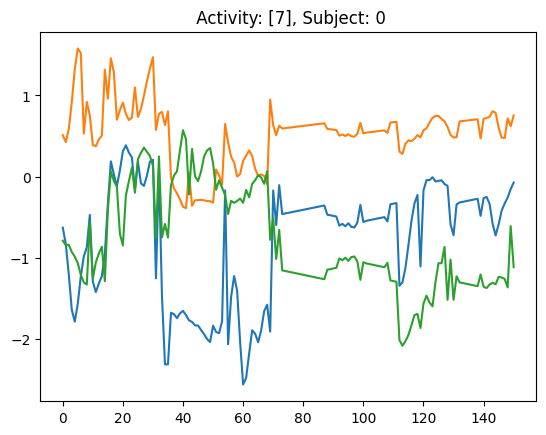

In [8]:
subject_id = 0
activity_id = 7

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")